# Lab 06: Decision Tree

Bài thực hành này có hai bài tập:
- Bài 1 (chỉ đạt tối đa 50% số điểm) Dùng Decision Tree và Random Forest của sklearn trên data cho sẵn, xử lý data, chỉnh các hyper-parameter sao cho accuracy trên tập valid cao nhất. Nên đạt acc xấp xỉ với Logistic Linear Regression như đã làm trong lab 03 để đạt điểm tối đa phần này.
- Bài 2 (làm tốt đc 100% điểm luôn) Cài đặt lại thuật toán học Decision Tree theo sườn đã cho (phía dưới), chỉ dùng thư viện mặc định và numpy, chỉ cần chạy ổn không cần ra kết quả tốt bằng sklearn.

Làm cả 2 bài cũng đc (tối đa cũng 100% điểm thôi).

## Data

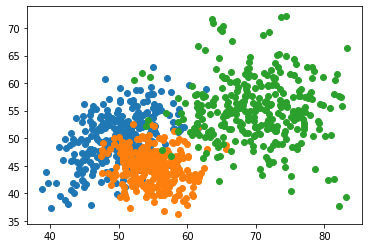

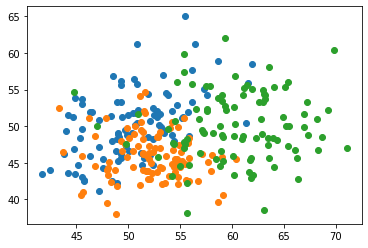

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv("bt_train.csv")

x1_train = train['x1'].values
x2_train = train['x2'].values
y_train = train['label'].values

plt.scatter(x1_train[y_train == 0], x2_train[y_train==0])
plt.scatter(x1_train[y_train == 1], x2_train[y_train==1])
plt.scatter(x1_train[y_train == 2], x2_train[y_train==2])

plt.figure()
valid = pd.read_csv("bt_valid.csv")
x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values
plt.scatter(x1_valid[y_valid == 0], x2_valid[y_valid==0])
plt.scatter(x1_valid[y_valid == 1], x2_valid[y_valid==1])
plt.scatter(x1_valid[y_valid == 2], x2_valid[y_valid==2])

## Decision Tree
Dưới đây là sườn một cây quyết định, hãy xây dựng thuật toán tự xây dựng một cây

In [2]:
class Node:
    """Ta giả sử các feature đều ở dạng số thực
    node sẽ lưu index của feature và một giá trị ngưỡng split_value
    đồng thời cũng lưu node con hoặc là class đoán
    khi predict tại node
    giá trị của feature được đem so sánh với ngưỡng, tùy vào kết quả lớn hay nhỏ
    mà trả về một node hoặc một class khác nhau
    """
    def __init__(self,):
        
        self.feature_index = 0       ## lưu cột feature số mấy
        self.split_value = 0.0       ## lưu ngưỡng
        
        self.left_node = 0
        self.right_node = 0
        ## left_node và right_node là một node, hoặc là một class (kiểu biến nào cũng đc) biểu thị dự đoán
        
    def predict(self, sample):
        ## nhận một feature vector
        ## trả về một node con, hoặc một class
        if sample[self.feature_index] < self.split_value:
            return self.left_node
        return self.right_node
        
class DecisionTree:
    
    def __init__(self,):
        self.root = Node()
        
    def __predict_at_node__(self, sample, node):
        ## sample là một vector feature
        if type(node) is not Node:
            return node
        return self.__predict_at_node__(sample, node.predict(sample))
        
    def predict(self, X):
        ## X là một ma trận, mỗi dòng là một sample
        return np.asarray([self.__predict_at_node__(sample, self.root) for sample in X])


Giả sử muốn xây dựng một cây quyết định sau:
- Nhận một vector gồm chiều cao và cân nặng, đoán xem người đó có 6 múi không
- Nếu chiều cao nhỏ hơn 165 thì chắc chắn không có 6 múi
- Nếu cao hơn 165 và nặng hơn hoặc bằng 65 thì có 6 múi

In [3]:
tree = DecisionTree()
tree.root = Node()

# chiều cao nhỏ hơn 165 thì ko có 6 múi
tree.root.feature_index = 0
tree.root.split_value = 168
tree.root.left_node = "ko 6 múi"    ## feature_value < split_value
tree.root.right_node = Node()       ## feature_value >= split_value

# chiều cao đã lớn hơn 165 rồi
# cân nặng nhỏ hơn 65 thì ko có 6 múi, còn lại có
tree.root.right_node.feature_index = 1
tree.root.right_node.split_value = 65
tree.root.right_node.left_node = "ko 6 múi"   ## feature_value < split_value
tree.root.right_node.right_node = "6 múi"     ## feature_value >= split_value

tree.predict([[155, 50], [168, 65], [168, 64]])

array(['ko 6 múi', '6 múi', 'ko 6 múi'], dtype='<U8')

## Nộp bài
- Code và chạy kết quả lưu vào file notebook NMMH_TH6_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
- Nén thành file NMMH_TH6_MSSV.rar (.zip) và nộp về: dinhvietcuong1996@gmail.com
- Deadline: 23g59 thứ 3 ngày 30/06/2020. Nộp trễ bị chia đôi số điểm.